$\newcommand{\is}{\mathrel{\mathop:=}}$
$\newcommand{\range}{\mathop{ran}}$
$\newcommand{\setof}[1]{\left \{ #1 \right \}}$
$\newcommand{\card}[1]{\left | #1 \right |}$
$\newcommand{\tuple}[1]{\left \langle #1 \right \rangle}$
$\newcommand{\emptytuple}{\left \langle \right \rangle}$
$\newcommand{\tuplecat}{\cdot}$
$\newcommand{\stringcat}{\cdot}$
$\newcommand{\emptystring}{\varepsilon}$
$\newcommand{\String}[1]{\mathit{#1}}$
$\newcommand{\LeftEdgeSymbol}{\rtimes}$
$\newcommand{\RightEdgeSymbol}{\ltimes}$
$\newcommand{\LeftEdge}{\LeftEdgeSymbol}$
$\newcommand{\RightEdge}{\RightEdgeSymbol}$
$\newcommand{\mult}{\times}$
$\newcommand{\multisum}{\uplus}$
$\newcommand{\multimult}{\otimes}$
$\newcommand{\freqsymbol}{\mathrm{freq}}$
$\newcommand{\freq}[1]{\freqsymbol(#1)}$
$\newcommand{\prob}{P}$
$\newcommand{\count}[2]{\card{#2}_{#1}}$
$\newcommand{\inv}[1]{#1^{-1}}$
$\newcommand{\Lex}{\mathit{Lex}}$
$\newcommand{\length}[1]{\left | #1 \right |}$
$\newcommand{\succ}{S}$
$\newcommand{\sprec}{<}$
$\newcommand{\Rcomp}[2]{#1 \circ #2}$
$\newcommand{\domsymbol}{\triangleleft}$
$\newcommand{\idom}{\domsymbol}$
$\newcommand{\pdom}{\domsymbol^+}$
$\newcommand{\rdom}{\domsymbol^*}$
$\newcommand{\indegree}[1]{\mathrm{in(#1)}}$
$\newcommand{\outdegree}[1]{\mathrm{out(#1)}}$
$\newcommand{\cupdot}{\cup\mkern-11.5mu\cdot\mkern5mu}$
$\newcommand{\pmatrix}[1]{\left ( \matrix{#1} \right )}$

# More Refined Bag-of-Words Models

The main advantage of the bag-of-words model of texts is its simplicity - determining the meaning of a text only requires our very simple function $b$, which maps strings of words to sets of words.
But while practical applications often rank simplicity and efficiency over accuracy, the bag-of-words model is too simple even for those.
There are at least three problems:

1. The word bags are cluttered with uninformative words like *is*, *the*, *of*, and so on.
1. Context is not taken into account at all, even within individual sentences.
   Among other things, *The dog bit the man* and *The man bit the dog* incorrectly receive the same meaning.
   And along the same lines, *Not every student thinks they should leave* and *Every student thinks they should not leave* are taken to have identical meanings, too.
1. Since we do not count how often words occur, a text that mentions global warming once in passing is taken to cover this topic to the same extent as one that mentions it over a hundred times.

We will address the first two problems in this unit, whereas the third one still has to wait a bit.

## Removing Stop Words

The problem of cluttered sets is a very real one.
This is due to **Zipf's law**, which was formulated by the linguist George Kingsley Zipf.

<div class=definition>
    Let $t$ be a text of natural language utterances, and $R$ a total ranking of words by their frequency in $t$.
    Then the frequency $f$ of a word in $t$ is inversely proprotional to its rank $r$ in $R$ ($f = \frac{1}{r}$).
</div>

Zipf's law tell us that the most common word in a text occurs

- two times as often as the second most common one,
- three times as often as the third most common one,
- four times as often as the fourth most common one,
- and so on.

So if the most common word occurs 100 times, the second occurs 50 times, the third one 33 times, the fourth one 25 times, and so on.
As in all statistical claims, there is a certain margin of error, so the second word may actually occur 57 times and the third one 26 times.
But overall the frequency distribution of a natural language will have a very peculiar shape, where a few words make up the majority of a text while many other words occur only once.

Let us sharpen our terminology a bit so that we can express this idea more clearly.
We need to distinguish between the *word type*, which is the word in the abstract sense, and the *word token*, the concrete instances of the word.
For example, the sentence *John is obviously John* contains the word types *John*, *obviously*, and *is*.
But it contains two tokens of the type *John*, one token of the type *obviously*, and one token of the types *is*.
Note that with this new terminology, the bag-of-words model maps a sequence of word tokens to a set of word types.
Returning to Zipf's law, we can now state its consequence in a less misleading manner: very few word types make up the majority of word tokens in a text, whereas the majority of word types only have one token each in the text.
If we draw a plot with the word types in a text in descending frequency along the $x$-axis and their number of tokens as the $y$-axis, this produces a curve that starts out high, drops off quickly, and then has a very long tail that approaches 0 but never reaches it.

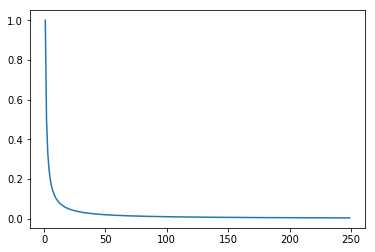

In [1]:
# import plotting library as plt
import matplotlib.pyplot as plt
import numpy as np

# define a function with Zipfian distribution
def f(x):
    return 1/x

# possible values for x: 1, 2, 3, 4, ..., 250
x = np.arange(1, 250)

# compute f(x) for every x
plt.plot(x, f(x))

# show the plotted diagram
plt.show()

Zipf's law is more than an interesting curiosity, it has noticeable repercussions in practice.
In fact, it is one of the primary reasons why language technology is still much less capable than humans despite the recent advances in machine learning.
Machine learning algorithms are designed to focus on the robust, very frequent aspects of a data set while ignoring the rare outliers.
But Zipf's law tells us that this is exactly the wrong approach for language.
Here is what you get if you take the first 250 words of *Moby Dick* and throw away any words that aren't among the 250 most common in the book.

In [2]:
import urllib.request
import re
from collections import Counter

urllib.request.urlretrieve("http://www.gutenberg.org/files/2701/2701.txt", "mobydick.txt")
with open("mobydick.txt", "r") as text:
    # tokenize string into list of lowercase words
    text = re.split("[^\w]", text.read().lower())
    # compute most frequent word types
    most_frequent = [count[0] for count in Counter(text).most_common(250)]
    # find the beginning of Chapter 1 in the file
    for n in range(len(text)):
        if text[n] == "call" and\
        text[n+1] == "me" and\
        text[n+2] == "ishmael":
            start = n
            break
    try:
        # and now take the first 250 words and remove all infrequent ones
        filtered = [word for word in text[n:n+250]
                    if word in most_frequent]
        # and put the tokenized list back into a string
        print(" ".join(filtered))
    except:
        print("Couldn't find start")

Not too illuminating, is it?
With language, it is the outliers that are interesting rather than the very frequent stuff.
An algorithm that favors the excessively common over the rare is ill-suited for language.

Alright, let us return to our original bag of words model and improve it by removing uninformative word types from the word bags.
There are multiple ways we can do this, but first we must agree on what counts as an uninformative word type.
For the sake of simplicity, we will consider a word type uninformative iff it is a *stop word*, i.e. a word type with a very high token frequency.

Here is a list of English stop words (using a very lenient definition of word that also includes contractions): *a, about, above, after, again, against, all, am, an, and, any, are, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can't, cannot, could, couldn't, did, didn't, do, does, doesn't, doing, don't, down, during, each, few, for, from, further, had, hadn't, has, hasn't, have, haven't, having, he, he'd, he'll, he's, her, here, here's, hers, herself, him, himself, his, how, how's, i, i'd, i'll, i'm, i've, if, in, into, is, isn't, it, it's, its, itself, let's, me, more, most, mustn't, my, myself, no, nor, not, of, off, on, once, only, or, other, ought, our, ours, ourselves, out, over, own, same, shan't, she, she'd, she'll, she's, should, shouldn't, so, some, such, than, that, that's, the, their, theirs, them, themselves, then, there, there's, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, very, was, wasn't, we, we'd, we'll, we're, we've, were, weren't, what, what's, when, when's, where, where's, which, while, who, who's, whom, why, why's, with, won't, would, wouldn't, you, you'd, you'll, you're, you've, your, yours, yourself, yourselves*.

Now let's see how our formalization of the model is amended to exclude such uninformative word types.
As before, we assume a fixed set $\Sigma$ of words which texts are built from, and we furthermore let $S \subseteq \Sigma$ be an agreed upon set of stop words.
Then we define a new function $\mathrm{del}_S(t): \Sigma^* \rightarrow \Sigma^*$ from $\Sigma$-strings to $\Sigma$-strings.
In this definition, $\Sigma^*$ is a small extension of $\Sigma^+$ that also includes the empty string $\emptystring$.
The job of $\mathrm{del}_S(t)$ is to remove all stop words from $t$:

$$
\mathrm{del}_S(t)
\is
\begin{cases}
    \emptystring & \text{if } t \in S\\
    t            & \text{if } t \in \Sigma - S\\
    \mathrm{del}_S(u) \tuplecat \mathrm{del}_S(v) & \text{if } t = u \tuplecat v, \text{ where } u,v \in \Sigma^+\\
\end{cases}
$$

The refined bag-of-words model without stop words, then, is the result of first applying $\mathrm{del}_S$ and then $b$.
So a text $t$ would be mapped to $b(\mathrm{del}_S(t))$.

Note that we could have defined the very same mapping in a very different manner, e.g.\ by equating the model with a new function $\hat{b}(t) \is b(t) - S$.
From a mathematical perspective, the two definitions describe exactly the same mapping from texts to word bags, and thus they are interchangeable.
There may even be reasons to prefer the second definition, for instance in might run more efficiently in certain programs.
But programming implementations are not something we should concern ourselves with, the main goal for us is generality and clarity.
And as we will see next, the definition above has the advantage of being more flexible and malleable.

# Accommodating Context

The bag of words model only considers words in isolation, without their surrounding words.
As we saw at the beginning of this unit, this simplification conflates texts that should have distinct meanings.
While such problems cannot be fully avoided without moving to a much more sophisticated model of sentence meaning, we can alleviate the problem somewhat by taking local context into consideration.
We do this by moving from words to sequences of words.
Or in more formal jargon, by moving from *unigrams* to *$n$-grams*.

<div class=definition>
    Given a fixed set $\Sigma$ of words, an $n$-gram is a string of length $n$ (i.e. a member of $\Sigma^n$).
</div>

As you can see from the definition, $n$-gram is just another term for a string of a fixed length.
Why a special term?
Well, because "$n$-gram" is shorter than "string of length $n$", and laziness is the driver of all human innovation.

Since we are already on the topic of terminology, let us put another few common terms in place:

$n$ | special name
:-: | :--
1   | unigram
2   | bigram
3   | trigram

<div class=definition>
    Given a text $t$ over $\Sigma$, we say that $g$ is an *$n$-gram of $t$* iff $g \in \Sigma^n$ and there exist $u,v \in \Sigma^*$ such that $t = u \cdot g \cdot v$.
</div>


<div class=example>
    The bigram *John obviously* is a bigram of *John obviously is John* because we can find corresponding $u \is \emptystring$ and $v \is \mathit{John\ obviously}$.
    But it is not a bigram of *John is obviously John*.
</div>

With $n$-grams, we can refine the bag-of-words model so that it doesn't compute a set of word types but a set of $n$-grams.
Here is how we do this in a step-wise fashion by combining two functions.
The first step will still be to remove stop words with the function $\mathrm{del}_S$
Next, we define a function that extracts all the $n$-grams from a text.
This function is $b_n: \Sigma^* \rightarrow \wp(\Sigma^n)$ with $t \mapsto \setof{ g \mid t = u \tuplecat g \tuplecat v, \text{ where } g \in \Sigma^n \text{ and } u,v \in \Sigma^*}$.
The $n$-gram bag of words model simply maps every text $t$ to $b_n(\mathrm{del}_S(t))$.

<div class=example>
    Suppose we use a bigram bag-of-words model on the sentence $s \is$ *the man thinks the man thinks the man is handsome*.
    The image of $s$ under $\mathrm{del}_S$ is *man thinks man thinks man handsome*.
    We can decompose this string in many different ways to get a pattern of the form $u \tuplecat g \tuplecat v$:
    $$
    $$\begin{array}{rcl}
    \emptystring                 & \tuplecat & \text{man thinks}   & \tuplecat & \text{man thinks man handsome}\\
    \text{man}                   & \tuplecat & \text{thinks man}   & \tuplecat & \text{thinks man handsome}\\
    \text{man thinks}            & \tuplecat & \text{man thinks}   & \tuplecat & \text{man handsome}\\
    \text{man thinks man}        & \tuplecat & \text{thinks man}   & \tuplecat & \text{handsome}\\
    \text{man thinks man thinks} & \tuplecat & \text{man handsome} & \tuplecat & \emptystring\\
    \end{array}$$
    $$
    The set of all middle components is $\setof{\text{man thinks}, \text{thinks man}, \text{man handsome}}$.
    This is exactly the set of bigrams computed by the bigram bag-of-words model.
</div>

Note that even though $b_n$ seems to be defined very differently from $b$, the two compute exactly the same mapping when $n = 1$.
So this new definition is a proper generalization of the model we started out with because it still subsumes the original as a special case.
With the ability to look at the local context of a word, the model avoids some particularly bad meaning conflations.

<div class=example>
    The image of *the dog bit the man* under a trigram bag of words model is $\setof{\text{dog bit man}}$, whereas *the man bit the dog* is mapped to $\setof{\text{man bit dog}}$.
    However, the role of negation in *not every student thinks they should leave* and *every student thinks they should not leave* would still be missed because *not* is a stop word.
    Only if the model is told not to remove *not* from strings does a difference emerges, but then it does even with a bigram model - the former sentence contains the bigram *not every*, the latter *not leave*.
</div>